<a href="https://colab.research.google.com/github/JoaoLira1850/redesneurais-iris/blob/main/Redes_Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Input
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import json

In [ ]:
# Carregando sos dados do dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

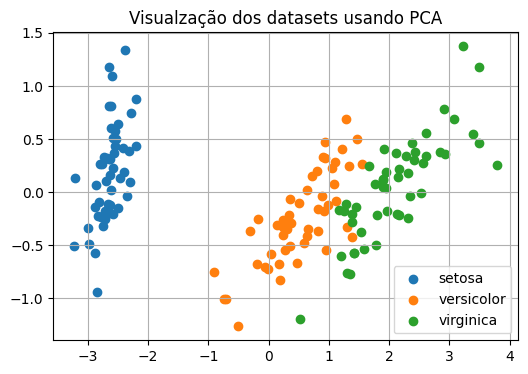

In [ ]:
#Visualização dos dados usando PCA

pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)
plt.figure(figsize=(6,4))
for i in range(3):
  plt.scatter(X_pca[y==i,0],X_pca[y==i,1],label=target_names[i])
plt.title('Visualzação dos datasets usando PCA')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Pre-processamento do dataset

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_encoded = to_categorical(y)

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_encoded,test_size=0.2,random_state=42)

In [ ]:
# Construir o modelo de rede neural
model = Sequential()
model.add(Input(shape=(X_train.shape[1],))) # Entrada
model.add(Dense(10,activation='relu')) # camada
model.add(Dense(3,activation='softmax')) # saida


In [ ]:
# Compilar o modelo
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Treinar
history = model.fit(X_train,y_train,epochs=100,validation_split=0.2,verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.6354 - loss: 1.0137 - val_accuracy: 0.4583 - val_loss: 1.1402
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6432 - loss: 0.9918 - val_accuracy: 0.4583 - val_loss: 1.1255
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6237 - loss: 1.0035 - val_accuracy: 0.4583 - val_loss: 1.1111
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6875 - loss: 0.9366 - val_accuracy: 0.4583 - val_loss: 1.0972
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6406 - loss: 0.9523 - val_accuracy: 0.4583 - val_loss: 1.0832
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6393 - loss: 0.9465 - val_accuracy: 0.4583 - val_loss: 1.0699
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6354 - loss: 0.9303 - val_accuracy: 0.4583 - val_loss: 1.0569
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6745 - loss: 0.8841 - val_accuracy: 0.4583 - val_loss

In [ ]:

# Avaliação do modelo
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print(f'Acurácia do teste: {acc:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9333 - loss: 0.3958
Acurácia do teste: 0.93


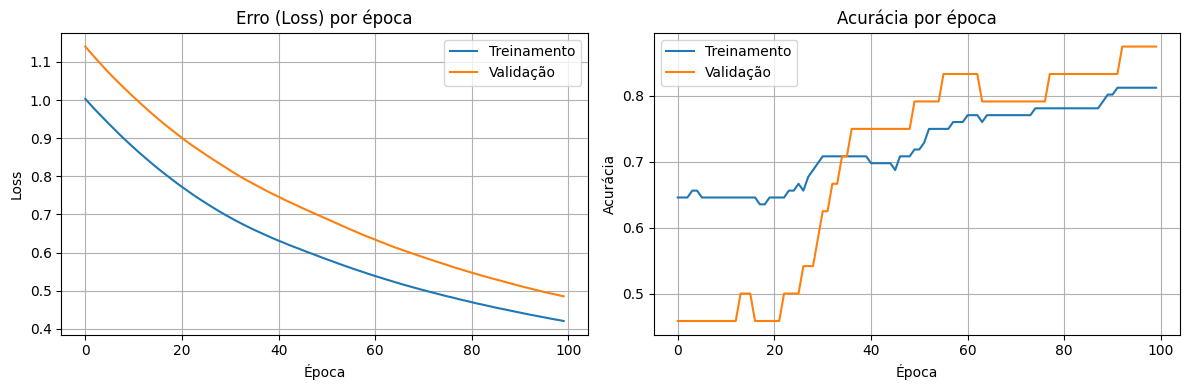

In [ ]:
# Gráficos de aprendizado
plt.figure(figsize=(12,4))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Erro (Loss) por época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Acurácia
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia por época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Previsões
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test, axis=1)

# Mapeia classes para valores no eixo Y: 0 → 1, 1 → 0, 2 → -1
def map_class(y):
    return np.select([y == 0, y == 1, y == 2], [1, 0, -1])

y_true_mapped = map_class(y_true)
y_pred_mapped = map_class(y_pred)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_true_mapped, 'yo', label='Classe Real')
plt.plot(y_pred_mapped, 'bx', label='Classe Prevista')
plt.title("Comparação entre Classe Real e Prevista (Eixo Y: Classe transformada)")
plt.xlabel("Índice da Amostra no Conjunto de Teste")
plt.ylabel("Classe Mapeada (1, 0, -1)")
plt.yticks([1, 0, -1], ["Classe 0", "Classe 1", "Classe 2"])
# plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(0.8, 0.25))
plt.tight_layout()
plt.show()

NameError: name 'model' is not defined